## Ideas
- Change spacing, use density as given, measure number of types?
- Vary visibility as a distribution! Keep everything perfect except visibility. Seed with number of artifacts calibrated from current visibility. E.g., if the stated visibility is 70% and they found 80 artifacts, seed with 114 artifacts. See how much moving the SD of a normal distribution impacts number of artifacts discovered.

In [148]:
80/.7

114.28571428571429

In [129]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import prospect

In [130]:
tracts = gpd.read_file("../data/antikythera/tracts/tracts.shp")

In [160]:
tracts.area.max() / 10000

1.1570815980852371

In [156]:
(tracts.area / 10000).median()

0.5854272237971132

<AxesSubplot:ylabel='Frequency'>

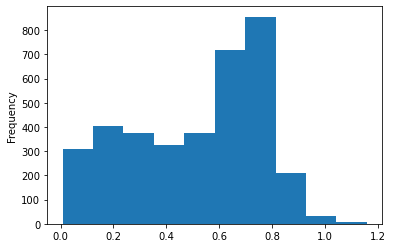

In [155]:
(tracts.area / 10000).plot(kind="hist")

In [131]:
tract4298 = tracts.loc[tracts["Tract"] == 4298].iloc[0]
tract4298

Tract                                                      4298
Team                                                          D
Leader                                                       17
Direction                                                   350
DateWalked                                           2005-07-07
WO1                                                          29
WO2                                                          20
WO3                                                          17
WO4                                                          28
WO5                                                          15
WO6                                                           0
WO7                                                           0
PN1                                                           1
PN2                                                           1
PN3                                                           1
PN4                                     

<AxesSubplot:>

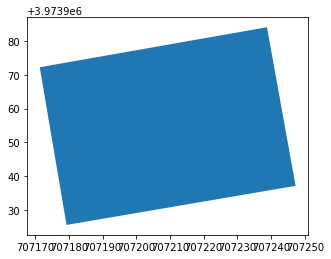

In [132]:
area = prospect.Area(name=tract4298["Tract"], shape=tract4298["geometry"], vis=tract4298["Visibility"])
area.df.plot()

In [133]:
diagnostic_pottery_df = pd.read_csv("../data/antikythera/pottery.csv")
# diagnostic_pottery = gpd.GeoDataFrame(
#     diagnostic_pottery_df, 
#     geometry=gpd.points_from_xy(diagnostic_pottery_df["Xsugg"], diagnostic_pottery_df["Ysugg"])
# )

In [134]:
counts_pottery_df = pd.read_csv("../data/antikythera/counts.csv")
counts_pottery = gpd.GeoDataFrame(
    counts_pottery_df, 
    geometry=gpd.points_from_xy(counts_pottery_df["Xsugg"], counts_pottery_df["Ysugg"])
)

In [135]:
pottery = counts_pottery.loc[:, ["UID", "Type", "geometry"]].merge(diagnostic_pottery_df, how="left", on="UID", suffixes=(None, "_diagnostics"))
pottery.columns = pottery.columns.str.lower()

In [136]:
tract_pottery = pottery.loc[pottery["type"]=="tract", :]

<AxesSubplot:>

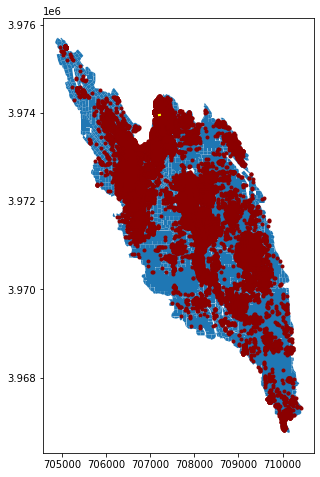

In [137]:
fig, ax = plt.subplots(figsize=(12, 8))
tracts.plot(ax=ax)
tract_pottery.plot(ax=ax, color="darkred", marker=".")
area.df.plot(ax=ax, color="yellow")

In [138]:
tract_pottery["unit"].dtype

dtype('O')

In [139]:
tract4298["Tract"].dtype

dtype('int64')

In [146]:
tract4298

Tract                                                      4298
Team                                                          D
Leader                                                       17
Direction                                                   350
DateWalked                                           2005-07-07
WO1                                                          29
WO2                                                          20
WO3                                                          17
WO4                                                          28
WO5                                                          15
WO6                                                           0
WO7                                                           0
PN1                                                           1
PN2                                                           1
PN3                                                           1
PN4                                     

In [143]:
pottery_from_tract = tract_pottery.loc[tract_pottery["unit"]==tract4298["Tract"].astype("str")]

In [145]:
pottery_from_tract

uid   type                        geometry     xsugg  \
515    4298-20-1-15-2  tract  POINT (707198.200 3973941.700)  707198.2   
566     4298-28-1-5-8  tract  POINT (707226.400 3973941.300)  707226.4   
574    4298-29-1-35-1  tract  POINT (707180.200 3973958.100)  707180.2   
576    4298-28-1-25-2  tract  POINT (707222.600 3973961.000)  707222.6   
5105   4298-17-1-15-4  tract  POINT (707210.400 3973948.000)  707210.4   
...               ...    ...                             ...       ...   
12137   4298-20-1-5-5  tract  POINT (707197.900 3973934.500)  707197.9   
12138  4298-29-1-25-2  tract  POINT (707182.100 3973952.000)  707182.1   
13274   4298-28-1-5-9  tract  POINT (707227.200 3973933.700)  707227.2   
13836  4298-28-1-45-3  tract  POINT (707218.200 3973980.000)  707218.2   
13837  4298-29-1-45-6  tract  POINT (707177.700 3973971.800)  707177.7   

           ysugg type_diagnostics  unit  walker  passgrid section  ...  erom  \
515    3973941.7            tract  4298    20.0       1.0      15  ...   0.0   
566    3973941.3            tract  4298    28.0       1.0       5  ...  90.0   
574    3973958.1            tract  4298    29.0       1.0      35  ...  75.0   
576    3973961.0            tract  4298    28.0       1.0      25  ...  70.0   
5105   3973948.0            tract  4298    17.0       1.0      15  ...   0.0   
...          ...              ...   ...     ...       ...     ...  ...   ...   
12137  3973934.5            tract  4298    20.0       1.0       5  ...   0.0   
12138  3973952.0            tract  4298    29.0       1.0      25  ...   0.0   
13274  3973933.7            tract  4298    28.0       1.0       5  ...   0.0   
13836  3973980.0            tract  4298    28.0       1.0      45  ...  60.0   
13837  3973971.8            tract  4298    29.0       1.0      45  ...  70.0   

       mrom lrom ebyz mbyz even mven  lven recent other  
515     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  30.0  
566     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
574     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
576     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  10.0  
5105    0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
...     ...  ...  ...  ...  ...  ...   ...    ...   ...  
12137   0.0  0.0  0.0  0.0  0.0  0.0   0.0  100.0   0.0  
12138   0.0  0.0  0.0  0.0  0.0  0.0  50.0   50.0   0.0  
13274   0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0   0.0  
13836  20.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  20.0  
13837  10.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  20.0  

[189 rows x 43 columns]

<AxesSubplot:>

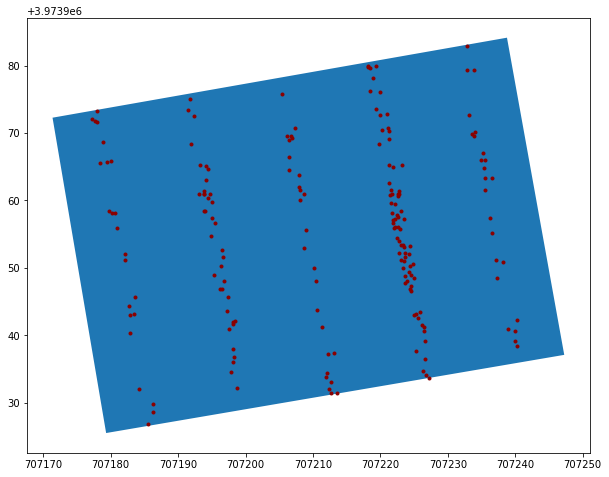

In [144]:
fig, ax = plt.subplots(figsize=(12, 8))
area.df.plot(ax=ax)
pottery_from_tract.plot(ax=ax, color="darkred", marker=".")

In [ ]:
tract_pottery.columns

In [ ]:
tract_from_uid = tract_pottery["uid"].str.split("-").dropna().apply(lambda x: x[0])

tract_from_uid 

In [ ]:
tract_pottery["unit"].dropna()

In [ ]:
tracts.head()

In [ ]:
counts[counts["Type"]=="tract"].plot()

In [ ]:
counts.shape

In [ ]:
counts_ = counts

In [ ]:
pottery_df = pd.read_csv("../data/antikythera/pottery.csv")
pottery = gpd.GeoDataFrame(pottery_df, geometry=gpd.points_from_xy(pottery_df["Xsugg"], pottery_df["Ysugg"]))

In [ ]:
pottery.shape

In [ ]:
pottery.plot()

In [ ]:
pottery.head()

In [ ]:
tracts = gpd.read_file("../data/antikythera/tracts/tracts.shp")

In [ ]:
tracts.plot()

In [ ]:
tracts.shape

In [ ]:
tracts.crs

In [ ]:
tracts.columns

In [ ]:
tracts["Visibility"].unique()

In [ ]:
tracts